# Importing Libraries

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path for df
path = r"C:\Users\Artemis07\Downloads\29-08-2023 Instacart Basket Analysis"

In [3]:
#importing df
instacart_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merge_department.pkl'))

In [4]:
instacart_merge.shape

(32404859, 38)

In [5]:
instacart_merge.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,num_of_dependants,marital_status,income,region,activity_flag,fam_profile,department,income_level,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
2,473747,1,prior,3,3,12,21.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)
4,431534,1,prior,5,4,15,28.0,196,1,1,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)


In [6]:
instacart_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'fam_profile', 'department', 'income_level',
       'age_group'],
      dtype='object')

# Customer profile for usage frequency and expenditure

_Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure._

In [7]:
# Creating marital_status_agg 
marital_status_agg = instacart_merge.groupby('marital_status').agg({'order_number': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

In [8]:
marital_status_agg

order_number            prices           
                                         mean max min      mean   max  min
marital_status                                                            
divorced/widowed                    17.275873  99   1  7.800054  25.0  1.0
living with parents and siblings    17.296372  99   1  7.800004  25.0  1.0
married                             17.088283  99   1  7.789850  25.0  1.0
single                              17.258766  99   1  7.783592  25.0  1.0

In [9]:
#Creating department aggregate
dept_agg = instacart_merge.groupby('department').agg({'order_number': ['mean', 'max', 'min'], 'prices' : ['mean', 'max', 'min']})

In [10]:
dept_agg

order_number             prices           
                        mean max min       mean   max  min
department                                                
alcohol            15.215751  99   1   8.143701  15.0  1.0
babies             19.310397  99   1   7.638380  15.0  1.0
bakery             17.170395  99   1   7.853809  15.0  1.0
beverages          17.225802  99   1   7.680502  15.0  1.0
breakfast          16.773669  99   1   8.028963  14.9  1.0
bulk               20.197148  99   1   8.348960  14.1  1.4
canned goods       16.165037  99   1   7.539976  15.0  1.0
dairy eggs         17.665606  99   1   8.329655  15.0  1.0
deli               16.473447  99   1   7.778701  15.0  1.0
dry goods pasta    15.895474  99   1   7.350283  15.0  1.0
frozen             15.457838  99   1   7.736553  15.0  1.0
household          15.694469  99   1   7.384058  15.0  1.0
international      16.439806  99   1   7.682264  15.0  1.0
meat seafood       15.887671  99   1  16.294443  25.0  8.0
missing            22.902379  99   1   8.660716  15.0  1.0
other              17.277920  99   1   6.990934  15.0  1.1
pantry             16.583536  99   1   8.009443  20.0  1.0
personal care      16.170638  99   1   7.996769  15.0  1.0
pets               15.340650  99   1   7.889070  15.0  1.0
produce            17.811403  99   1   7.981708  15.0  1.0
snacks             17.177343  99   1   4.275437   7.0  1.6

In [11]:
#Creating income level aggregate
income_level_agg = instacart_merge.groupby('income_level').agg({'order_number': ['mean', 'max', 'min'], 'prices' : ['mean', 'max', 'min']})

In [12]:
income_level_agg

order_number            prices           
                      mean max min      mean   max  min
income_level                                           
High income      17.318610  99   1  7.953086  25.0  1.0
Low income       16.645722  99   1  7.284118  25.0  1.0
Middle income    17.302621  99   1  7.961637  25.0  1.0

In [13]:
#Creating age_group aggregate
age_group_agg =  instacart_merge.groupby('age_group').agg({'order_number': ['mean', 'max', 'min'], 'prices' : ['mean', 'max', 'min']})

In [14]:
age_group_agg

order_number            prices           
                            mean max min      mean   max  min
age_group                                                    
Adult (34-49)          17.268731  99   1  7.793762  25.0  1.0
Older Adult (50-64)    17.145663  99   1  7.786076  25.0  1.0
Senior (65+)           17.098243  99   1  7.795731  25.0  1.0
Young Adult (18-33)    17.058771  99   1  7.784542  25.0  1.0

# Compare Customer profile with Region and Department

__Department and Customer Profiles__

In [15]:
#creating crosstab between region vs. department
region_dept = pd.crosstab(instacart_merge['department'], instacart_merge['region'], dropna = False)

In [16]:
region_dept

region,Midwest,Northeast,South,West
department,,,,
alcohol,36186,26542,48505,42463
babies,98983,75139,136104,113576
bakery,273869,208599,366060,323900
beverages,625574,483418,847560,731571
breakfast,163551,123574,221204,194704
bulk,8193,5802,10864,9714
canned goods,250702,186755,335868,294733
dairy eggs,1264223,954026,1693985,1486513
deli,245678,186817,329003,289751


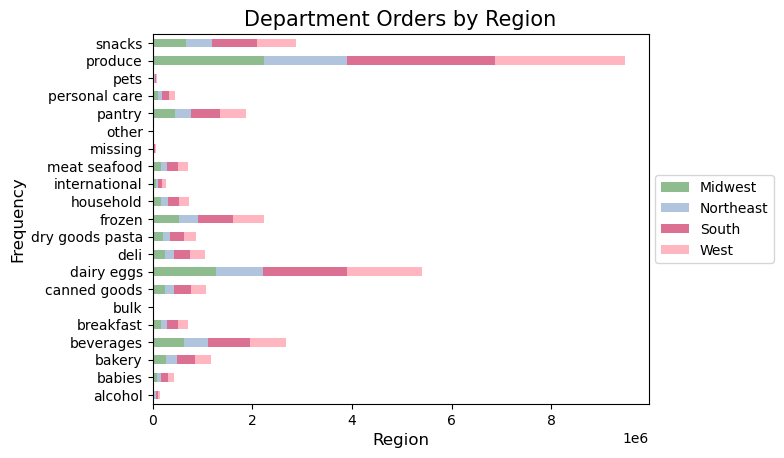

In [17]:
bar_region_dept = region_dept.plot(kind = 'barh', stacked = True, color =['darkseagreen', 'lightsteelblue','palevioletred', 'lightpink'])
plt.title("Department Orders by Region", fontsize = 15)
plt.xlabel("Region", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [18]:
#exporting Region vs Department bar chart to visualization
bar_region_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_dept.png'))

In [19]:
#Creating a crosstab between department and income level 
income_dept = pd.crosstab(instacart_merge['department'], instacart_merge['income_level'], dropna = False)

In [20]:
income_dept

income_level,High income,Low income,Middle income
department,,,
alcohol,41915,39747,72034
babies,107076,86414,230312
bakery,295806,277161,599461
beverages,629983,776511,1281629
breakfast,166382,196532,340119
bulk,7689,9688,17196
canned goods,273027,235677,559354
dairy eggs,1339353,1280316,2779078
deli,256344,259786,535119


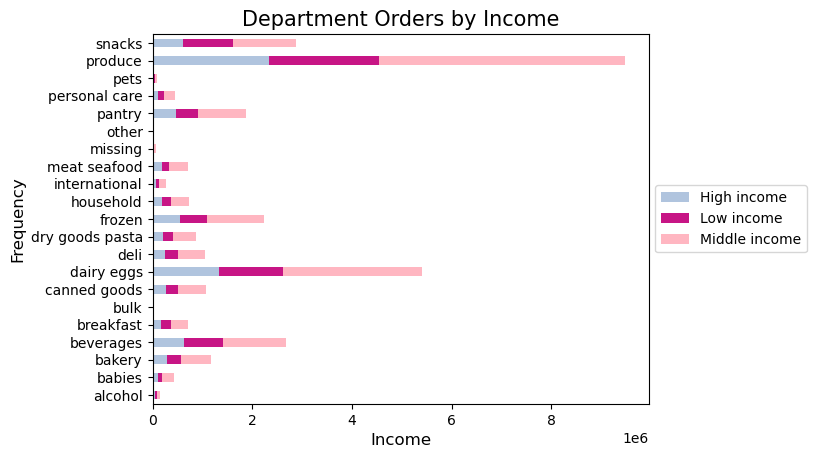

In [21]:
#Creating a bar chart with income_dept crosstab

bar_income_dept = income_dept.plot(kind = 'barh', stacked = True, color = ['lightsteelblue','mediumvioletred', 'lightpink'])
plt.title("Department Orders by Income", fontsize = 15)
plt.xlabel("Income", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [22]:
# Exporting Department Orders by Income level bar chart into visualizations folder
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_dept.png'))

In [23]:
#Creating crosstab between Department orders and fam_profile
dept_fam_profile = pd.crosstab(instacart_merge['department'], instacart_merge['fam_profile'], dropna = False)

In [24]:
#Checking dept_fam_profile
dept_fam_profile

fam_profile,Married with children,Single Adult,Young Adult
department,,,
alcohol,105682,39118,8896
babies,297162,106494,20146
bakery,821881,294405,56142
beverages,1889052,674442,124629
breakfast,493725,174577,34731
bulk,24621,8278,1674
canned goods,752030,264838,51190
dairy eggs,3788598,1349362,260787
deli,735689,265145,50415


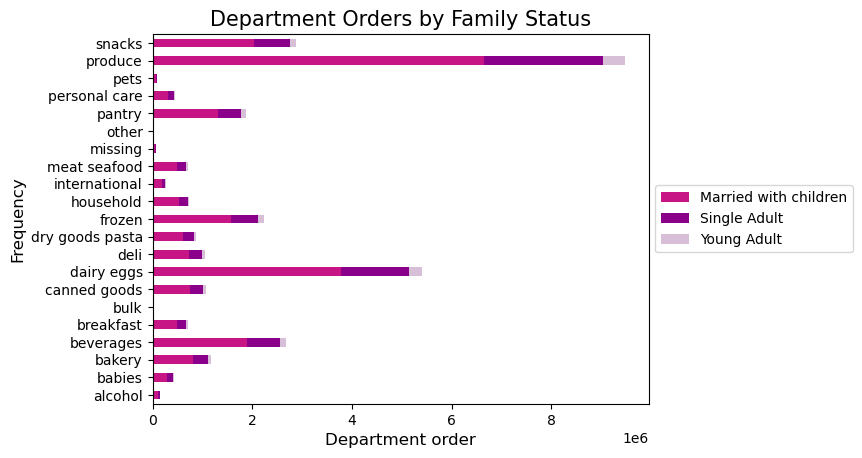

In [25]:
#Creating bar chart of dept_fam_profile
bar_dept_fam_profile = dept_fam_profile.plot(kind = 'barh', stacked = True, color = ['mediumvioletred', 'darkmagenta', 'thistle'])
plt.title("Department Orders by Family Status", fontsize = 15)
plt.xlabel("Department order", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [26]:
#exporting Department orders by family Status 
bar_dept_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_fam_profile.png'))

In [27]:
instacart_merge.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependants', 'marital_status', 'income', 'region',
       'activity_flag', 'fam_profile', 'department', 'income_level',
       'age_group'],
      dtype='object')

In [28]:
#Creating crosstab between department orders and age_group
dept_age_group = pd.crosstab(instacart_merge['department'], instacart_merge['age_group'], dropna = False)

In [29]:
dept_age_group

age_group,Adult (34-49),Older Adult (50-64),Senior (65+),Young Adult (18-33)
department,,,,
alcohol,38313,35798,39036,40549
babies,110692,98736,109445,104929
bakery,294268,274153,309522,294485
beverages,672960,633966,714832,666365
breakfast,176308,164767,183844,178114
bulk,8845,7748,9242,8738
canned goods,267420,248898,282438,269302
dairy eggs,1363571,1247458,1426213,1361505
deli,264999,245676,277618,262956


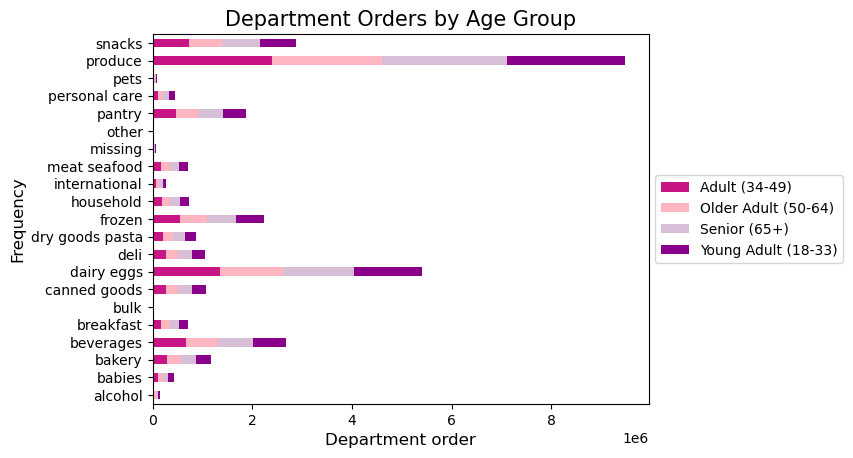

In [30]:
#Creating bar chart of dept_fam_profile
bar_dept_age_group = dept_age_group.plot(kind = 'barh', stacked = True, color = ['mediumvioletred', 'lightpink', 'thistle', 'darkmagenta'])
plt.title("Department Orders by Age Group", fontsize = 15)
plt.xlabel("Department order", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [31]:
#exporting Department orders by age group
bar_dept_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_age_group.png'))

__Regions and Customer Profiles__

In [32]:
#Creating a crosstab of region by age groups
region_age_group = pd.crosstab(instacart_merge['region'], instacart_merge['age_group'], dropna = False)

In [33]:
region_age_group

age_group,Adult (34-49),Older Adult (50-64),Senior (65+),Young Adult (18-33)
region,,,,
Midwest,1939142,1778290,1990844,1889049
Northeast,1428325,1309271,1553903,1431237
South,2555948,2373513,2662158,2582393
West,2229702,2095272,2368179,2217633


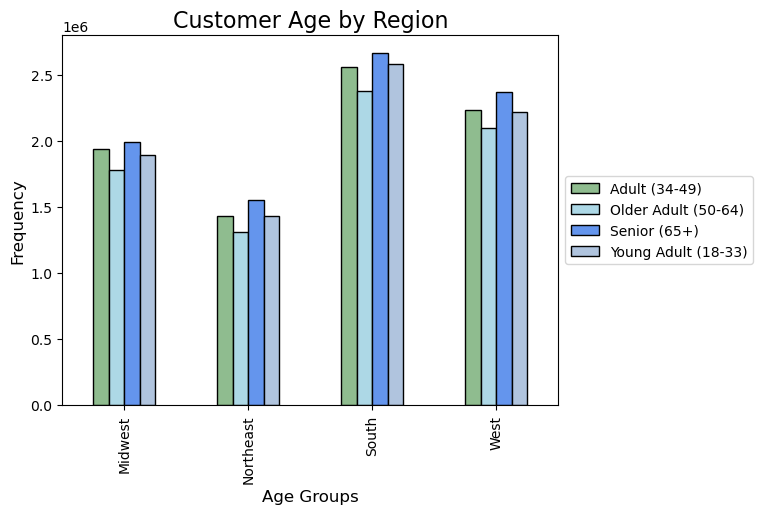

In [34]:
bar_region_age_group = region_age_group.plot(kind = 'bar', stacked = False, color = ['darkseagreen','lightblue', 'cornflowerblue', 'lightsteelblue'], edgecolor = ['black'])
plt.title("Customer Age by Region", fontsize = 16)
plt.xlabel('Age Groups', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [35]:
#exporting Customer Age by Region bar chart to visualization
bar_region_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_age_group.png'))

In [36]:
#Creating a crosstab between region vs. income groups
region_income_level = pd.crosstab(instacart_merge['region'], instacart_merge['income_level'], dropna = False)

In [37]:
region_income_level

income_level,High income,Low income,Middle income
region,,,
Midwest,1882766,1876034,3838525
Northeast,1402007,1429095,2891634
South,2447328,2570003,5156681
West,2171618,2225667,4513501


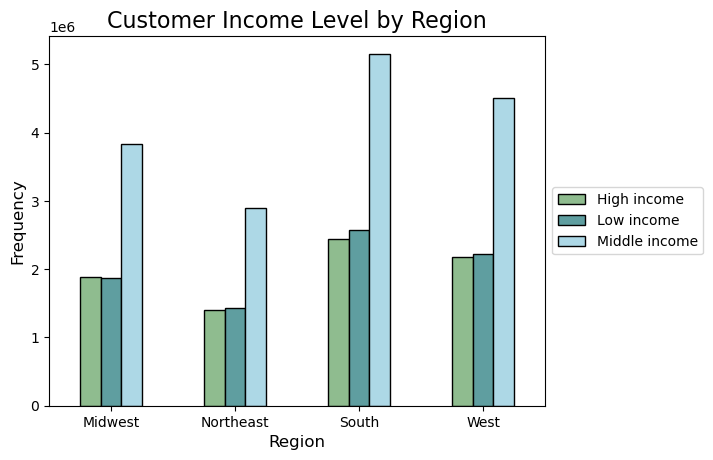

In [38]:
bar_region_income_level = region_income_level.plot(kind = 'bar', rot = 0, stacked = False, color = ['darkseagreen','cadetblue', 'lightblue'], edgecolor = ['black'])
plt.title("Customer Income Level by Region", fontsize = 16)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [39]:
#exporting Customer income level by Region bar chart to visualization
bar_region_income_level.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_income_level.png'))

In [40]:
instacart_merge.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,date_joined,num_of_dependants,marital_status,income,region,activity_flag,fam_profile,department,income_level,age_group
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,2/17/2019,3,married,40423,South,normal activity,Married with children,beverages,Low income,Young Adult (18-33)


In [41]:
#Creating crosstab between region and family profile
region_fam_profile = pd.crosstab(instacart_merge['region'], instacart_merge['fam_profile'], dropna = False)

In [42]:
region_fam_profile

fam_profile,Married with children,Single Adult,Young Adult
region,,,
Midwest,5325608,1905200,366517
Northeast,4036321,1418301,268114
South,7123025,2552298,498689
West,6271799,2221704,417283


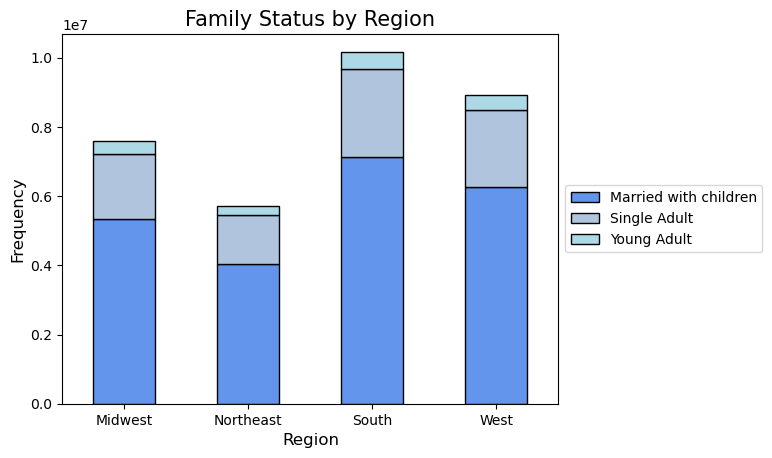

In [43]:
#Creating bar of region_fam_profile
bar_region_fam_profile = region_fam_profile.plot(kind = 'bar', rot = 0, stacked = True, color =['cornflowerblue', 'lightsteelblue', 'lightblue'], edgecolor = ['black'])
plt.title("Family Status by Region", fontsize = 15)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [44]:
#exporting Family Status by Region bar chart to visualization
bar_region_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_fam_profile.png'))